<a href="https://colab.research.google.com/github/AbhishekDutt/kaggle-fake-news/blob/master/fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Training Data

In [ ]:
%%bash
if [ ! -f data/fake-news.zip ]; then
  wget https://github.com/AbhishekDutt/kaggle-fake-news/raw/master/data/fake-news.zip -P data/
fi
if [ ! -f data/train.csv ]; then
  unzip data/fake-news.zip -d data/
fi

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [396]:
data = pd.read_csv("data/train.csv")
data = data.dropna()
train, valid = train_test_split(data, test_size=0.2)
train = train.copy()
valid = valid.copy()

# Util Functions

In [375]:
def get_null_info(data, text, ax):
  null_columns=data.columns[data.isnull().any()]
  str = "\nTotal count: {:,}".format(len(data))
  str += "\nNULL count: {:,}".format(len(data[data.isnull().any(axis=1)]))
  str += "\nNULL %: {:.2%}".format(len(data[data.isnull().any(axis=1)])/len(data)) 
  data.isnull().sum().plot(kind="bar", title="NULL by column "+ text, ax=ax);
  ax.text(0.5,-0.35, str, size=12, ha="center",  transform=ax.transAxes)
  

In [379]:
def plot_class_hist(data, text, ax):
  ax = data["label"].value_counts().plot(kind="bar", title="Row counts by class ("+text+")", ax=ax);
  for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      ax.annotate('{:.2%}'.format(height/len(data)), (p.get_x()+0.5*width, p.get_y()+height*0.9), ha='center', fontsize=15,
  color='white')

In [337]:
def box_plot(data, col, ax):
  bx = data.boxplot(column=[col], by='label', ax=ax, grid=False);
  m1 = data.groupby(['label'])[col].median().values
  m2 = data.groupby(['label'])[col].mean().values
  mL1 = ["{:,}".format(int(n)) for n in np.round(m1, 0)]
  mL2 = ["{:,}".format(int(n)) for n in np.round(m2, 0)]
  for tick in range(len(bx.get_xticklabels())):
    bx.text(tick+1.1, m1[tick], mL1[tick], color='b', weight='semibold')
    # bx.text(tick+1.1, m1[tick], mL2[tick], color='b', weight='semibold')
    

# Check for Null Data

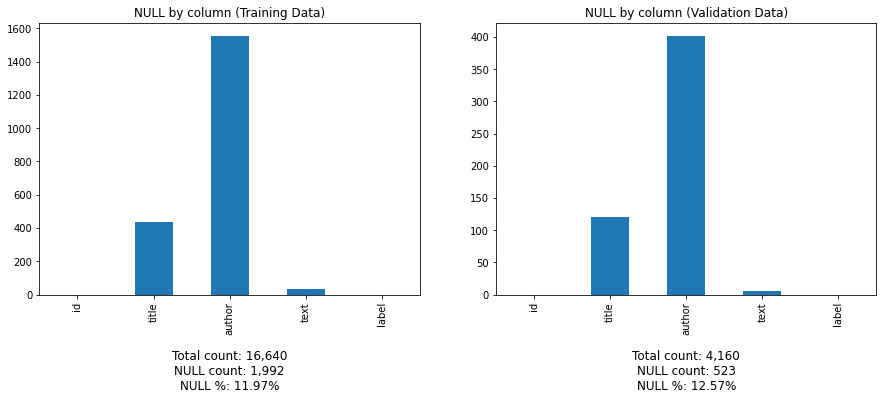

In [376]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(1, 2, 1)
get_null_info(train, "(Training Data)", ax);
ax=fig.add_subplot(1, 2, 2)
get_null_info(valid, "(Validation Data)", ax);

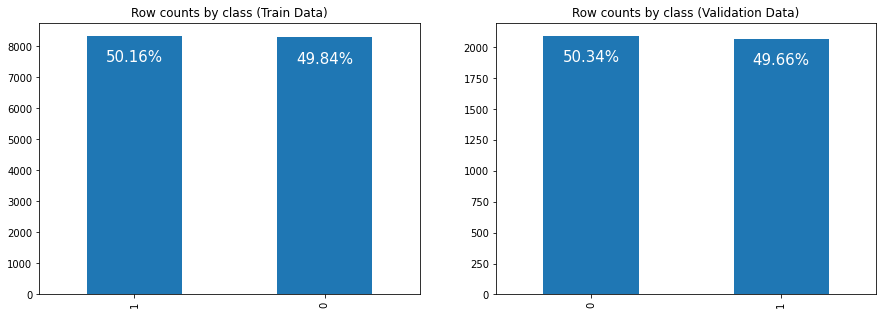

In [380]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(1, 2, 1)
plot_class_hist(train, "Train Data", ax=ax)
ax=fig.add_subplot(1, 2, 2)
plot_class_hist(valid, "Validation Data", ax=ax)

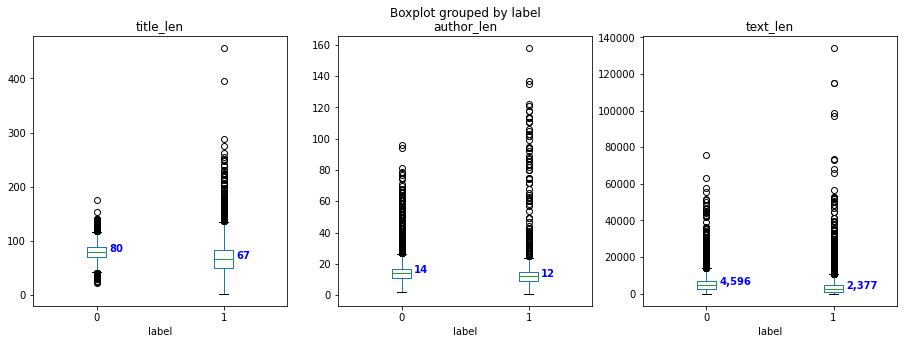

In [339]:
train['title_len'] = train['title'].str.len()
train['author_len'] = train['author'].str.len()
train['text_len'] = train['text'].str.len()

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(1, 3, 1)
box_plot(train, 'title_len', ax)
ax=fig.add_subplot(1, 3, 2)
box_plot(train, 'author_len', ax)
ax=fig.add_subplot(1, 3, 3)
box_plot(train, 'text_len', ax)

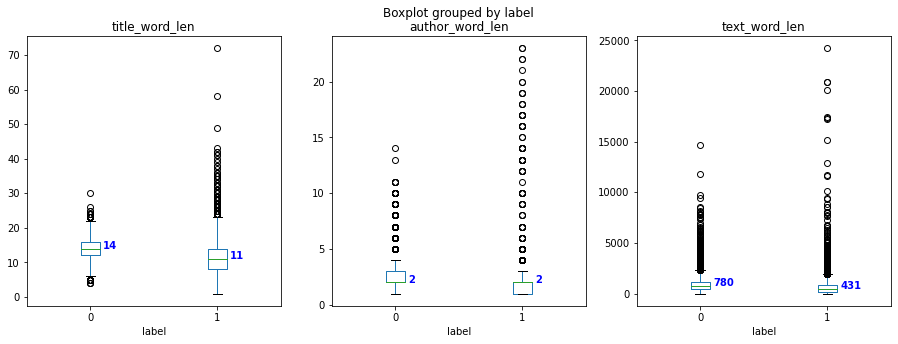

In [397]:
train['title_word_len'] = train['title'].str.split().apply(lambda x: len(x))
train['author_word_len'] = train['author'].str.split().apply(lambda x: len(x))
train['text_word_len'] = train['text'].str.split().apply(lambda x: len(x))

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(1, 3, 1)
box_plot(train, 'title_word_len', ax)
ax=fig.add_subplot(1, 3, 2)
box_plot(train, 'author_word_len', ax)
ax=fig.add_subplot(1, 3, 3)
box_plot(train, 'text_word_len', ax)

In [398]:
train

,id,title,author,text,label,title_word_len,author_word_len,text_word_len
6951,6951,WATCH As A Trump Advisor Has A HISSY FIT When ...,Andrew Bradford,WATCH As A Trump Advisor Has A HISSY FIT When ...,1,15,2,453
8474,8474,A 7-Year-Old Walks Into a Stand-Up Club ... - ...,Jason Zinoman,"When it comes to culture, I’m probably more pe...",0,13,2,1145
19708,19708,‘This Is Not My Child’: JetBlue Flew 2 Boys to...,Christine Hauser,It is any parent’s nightmare. Maribel Martinez...,0,19,2,633
13650,13650,"Sheldan Nidle Update – October 25, 2016",Madeline,"Planetary Activation Organization 12 Lamat, 11...",1,7,1,1363
4212,4212,Why You Should Tell Your Children How Much You...,Ron Lieber,When Scott Parker wanted his six offspring to ...,0,15,2,2314
...,...,...,...,...,...,...,...,...
15449,15449,"Jo Cox, EgyptAir, Golden State Warriors: Your ...",Andrea Kannapell and Sandra Stevenson,(Want to get this briefing by email? Here’s th...,0,15,5,865
7695,7695,ACLU Telethon: Tina Fey Says Trump ’Gave Up’ A...,Jerome Hudson,Actress Tina Fey hosted the American Civil Lib...,0,12,2,351
19170,19170,How a Secretive Branch of ISIS Built a Global ...,Rukmini Callimachi,"BREMEN, Germany — Believing he was answerin...",0,17,2,4501
5079,5079,"Re: WE’RE NOT NASTY! Like all Democrats, Sally...",Steve__Jacobson,WE’RE NOT NASTY! Why does Sally Kohn hate wome...,1,19,1,275


# Word Embedding:

In [ ]:
# One hot, count, tf-idf, word2vec, bert, gpt-2
# Models: logistic, xgboost, svd, nerual net